In [4]:
import pandas as pd
import numpy as np

In [6]:
df =pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
corr=df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [10]:
x=df.drop(['medv'],axis=1)[['lstat']]
y=df['medv']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [13]:
from sklearn.linear_model import Ridge

In [14]:
rid=Ridge(alpha=0.01)

In [15]:
param_grid={'alpha':[1,0.5,0.01,3,5,100,7,42]}

In [16]:
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(rid,param_grid)

In [18]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=0.01),
             param_grid={'alpha': [1, 0.5, 0.01, 3, 5, 100, 7, 42]})

In [19]:
grid.best_params_

{'alpha': 100}

In [20]:
grid.best_score_

0.5459604712020253

In [21]:
rid.fit(x_train,y_train)

Ridge(alpha=0.01)

In [22]:
rid.score(x_test,y_test)

0.4924573593562217

In [23]:
rid.coef_

array([-0.98053644])

In [24]:
rid.intercept_

35.22515913648968

In [25]:
x_new=pd.DataFrame({'lstat':[df.lstat.min(),df.lstat.max()]})
x_new

,lstat
0,1.73
1,37.97


In [26]:
preds=rid.predict(x_new)
preds

array([33.52883109, -2.00580965])

In [27]:
import matplotlib.pyplot as plt

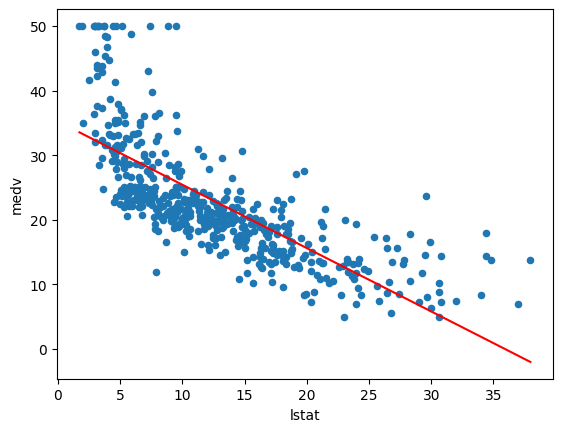

In [28]:
df.plot(kind='scatter',x="lstat",y='medv')
plt.plot(x_new,preds,c='r')

**Lasso Regression**

In [29]:
from sklearn.linear_model import Lasso

In [30]:
las=Lasso(alpha=0.01)

In [31]:
param_grid={'alpha':[1,0.5,0.01,3,5,100,7,42]}
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(las,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=0.01),
             param_grid={'alpha': [1, 0.5, 0.01, 3, 5, 100, 7, 42]})

In [32]:
grid.best_params_

{'alpha': 1}

In [33]:
grid.best_score_

0.5460331258099275

In [34]:
las.fit(x_train,y_train)

Lasso(alpha=0.01)

In [35]:
las.score(x_test,y_test)

0.4924807404151931

In [36]:
las.coef_rid

array([-0.98034251])

In [37]:
las.intercept_

35.22273543816752

In [39]:
preds=las.predict(x_new)
preds

array([33.52674289, -2.00086971])

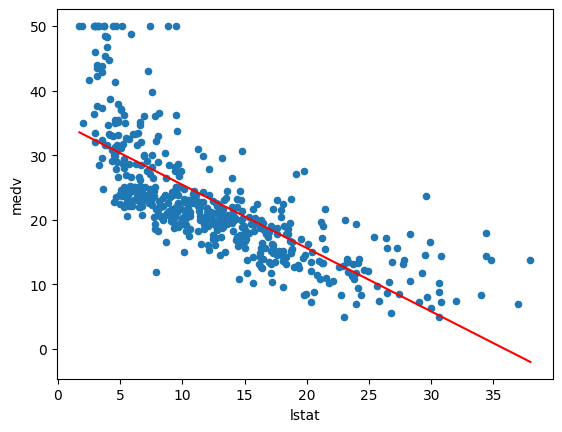

In [40]:
df.plot(kind='scatter',x="lstat",y='medv')
plt.plot(x_new,preds,c='r')